# Programming Assignment: k-means algorithm
## Name : 백찬희
## Student ID : 20142503
## Github : https://github.com/Baekchanhee/assignment03.git

# 필요한 패키지들 추가하기

In [1]:
import pandas as pd
import numpy as np #데이터 처리를 위한 모듈
import matplotlib.pyplot as plt #데이터 시각화를 위한 모듈

# k number of random point clusters 생성하는 함수

In [2]:
# k = number of clusters , nop = number of points 
def generatePointCluster(k, nop): 
    
    df = pd.DataFrame(columns=('x','y')) # column x,y인 dataframe 생성 (x,y)     
    
    ## for loop 
    for i in range(0, k):                # k개 random point cluster 생성
        
        if i != k - 1:                    # 1 ~ k -1 번째 cluster 이면
            points = np.random.rand(nop // k, 2) # nop / k개 의 [0,1) random point 생성  
            
        else :                           # k 번째 cluster 이면
                                         # nop / k 했을 때의 나머지도 더한다
            points = np.random.rand(nop // k + nop %  k, 2)                                                            
        
        mean = points.mean(axis=0)                        # [x_mean, y_mean] 구하기
        points = points - mean                            # demean 
        points = points * 100                             # * 100
        # -100 ~ 100 사이의 random한 center             
        center = np.random.randint(-100, 101, size=(1, 1))
        points = points + center                          # center 쪽으로 이동시키기
        
        tempdf = pd.DataFrame(points, columns=('x','y'))  # dataframe에 추가
        df = df.append(tempdf)
        
    ## initialize random label
    random_label = np.random.randint(k, size=(nop, 1)) # 0부터 k-1까지 random label
    df['label'] = random_label
   
    ## initialize index 
    df.index = np.arange(nop)
        
    return df    
    

# *generatePointCluster 함수 구체적으로 살펴보기 ($k = 3, nop = 30$ 이라 가정)*

### *0에서 1사이 $x,y$ random point 생성*

In [21]:
points = np.random.rand(10, 2) # nop / k 개의 [0,1) random point 생성

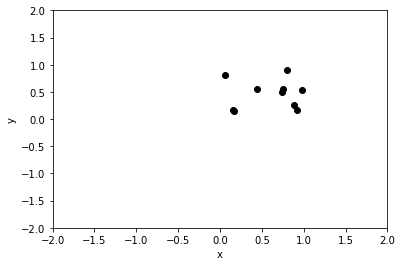

In [22]:
plt.scatter(points[:,0], points[:,1], color='k')      
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### *$x$평균, $y$평균 구하기*

In [23]:
mean = points.mean(axis=0) # [x_mean, y_mean] 구하기
mean

array([0.59057363, 0.46003847])

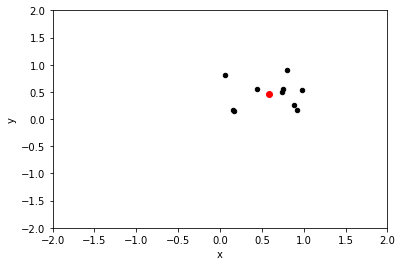

In [24]:
plt.scatter(points[:,0], points[:,1], color='k', s=20)      
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.scatter(*mean, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### *demean*  (demean한 점들의 평균은 0이 된다)

In [25]:
points = points - mean # demean
points.mean(axis=0)

array([-4.44089210e-17, -3.33066907e-17])

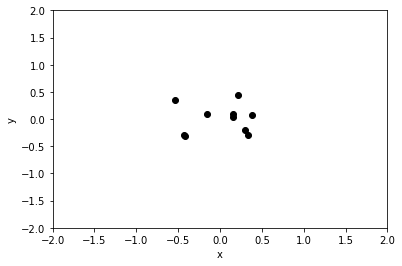

In [26]:
plt.scatter(points[:,0], points[:,1], color='k')      
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### *demean한 점들에 100곱하기  (빨간색 : 100곱하기 이전)*

In [27]:
beforepoints = points   # to show before * 100
points = points * 100   # * 100

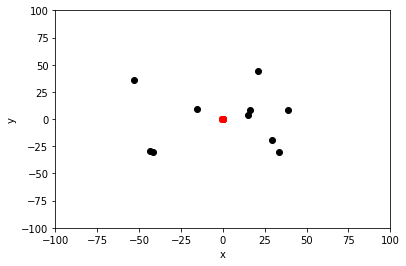

In [28]:
plt.scatter(points[:,0], points[:,1], color='k')  
plt.scatter(beforepoints[:,0], beforepoints[:,1], color='red')    
plt.xlim(-100, 100)    
plt.ylim(-100, 100)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### *center를 임의로 정해 이동시키기 (빨간색 : 이동전)*

In [29]:
beforepoints = points # to show before * 100
center = np.random.randint(-100, 101, size=(1, 1))# -100 ~ 100 사이의 random한 center 
points = points + center                          # center 쪽으로 이동시키기

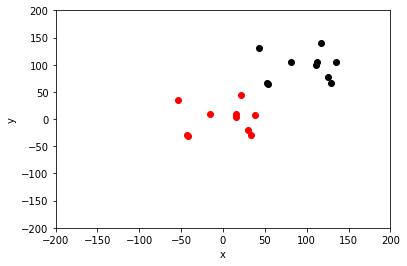

In [30]:
plt.scatter(points[:,0], points[:,1], color='k')  
plt.scatter(beforepoints[:,0], beforepoints[:,1], color='red')    
plt.xlim(-200, 200)    
plt.ylim(-200, 200)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### *생성한 점들을 dataframe에 추가하기*

In [31]:
df = pd.DataFrame(columns=('x','y'))        # column x,y인 dataframe 생성 (x,y) 

tempdf = pd.DataFrame(points, columns=('x','y'))  # dataframe에 추가
df = df.append(tempdf)
df

,x,y
0,42.628731,131.513175
1,117.187212,140.453184
2,129.334800,65.880393
3,112.009324,104.750898
4,52.733140,66.734883
5,54.147037,65.426784
6,80.706250,105.038210
7,111.066087,99.296137
8,125.519270,76.798323
9,134.668150,104.108014


## *위 과정을 k번 반복해서 k개의 random number cluster를 생성한다. *

### *완성된 dataframe에 임의로 label을 초기화 한다. (0부터 k-1까지) *

In [32]:
random_label = np.random.randint(3, size=(10, 1)) # 0부터 k-1까지 random label
df['label'] = random_label
df

,x,y,label
0,42.628731,131.513175,1
1,117.187212,140.453184,1
2,129.334800,65.880393,1
3,112.009324,104.750898,0
4,52.733140,66.734883,2
5,54.147037,65.426784,0
6,80.706250,105.038210,2
7,111.066087,99.296137,2
8,125.519270,76.798323,0
9,134.668150,104.108014,1


## *함수가 완성된 dataframe을 return 하고 종료된다 // generatePointCluster(k, nop)*

# input data : cluster 3개 random point 100개 생성  
### (*함수 구체적으로 설명하는 부분(italic체)은 k = 3 nop = 30* / 일반적인 흐름에서는 k = 3 nop = 100 이라 가정)

In [12]:
data = generatePointCluster(3, 100).copy() # k = 3 nop = 100

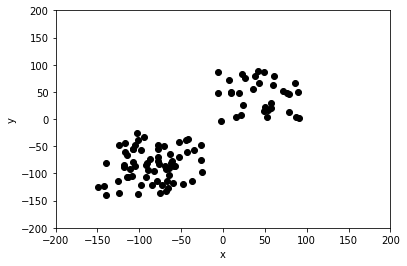

In [13]:
plt.scatter(data['x'], data['y'], color='k')  
plt.xlim(-200, 200)    
plt.ylim(-200, 200)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# centroid를 계산하는 함수

In [9]:
def computeCentroid(k, df):    # k : number of clusters // df : dataframe
   
    centroids = []             # list
    
    for i in range(k):        
        i_labeled = df[df['label'] == i]   # label이 i인 dataframe만 선택
        x_mean = np.mean(i_labeled['x'])   # 'x' column 들의 평균
        y_mean = np.mean(i_labeled['y'])   # 'y' column 들의 평균
        centroids.append([x_mean, y_mean]) # centroids list에 추가
    
    return centroids
    

# *computeCentroid 함수 구체적으로 살펴보기 ($k = 3$ 이라 가정)*

### *label이 i인 dataframe만 선택 ($i = 1$로 가정)*

In [33]:
i_labeled = df[df['label'] == 1]   # label이 i인 dataframe만 선택
i_labeled

,x,y,label
0,42.628731,131.513175,1
1,117.187212,140.453184,1
2,129.334800,65.880393,1
9,134.668150,104.108014,1


### *label이 i인 점들의 x값 평균*

In [34]:
x_mean = np.mean(i_labeled['x'])   # 'x' column 들의 평균
x_mean

105.95472319298491

### *label이 i인 점들의 y값 평균*

In [35]:
y_mean = np.mean(i_labeled['y'])   # 'y' column 들의 평균
y_mean

110.48869144352462

### *centroids list에 추가*

In [36]:
centroids = []
centroids.append([x_mean, y_mean]) # centroids list에 추가
centroids

[[105.95472319298491, 110.48869144352462]]

## *위 과정을 k번 반복하여 k개의 centroid를 갖는 list를 return 한다 // computeCentroid(k, df)*

# initial centroid를 계산 

In [14]:
recent_centroids = computeCentroid(3, data)
recent_centroids

[[-40.35367914389768, -40.20552321578926],
 [-38.35942378733378, -43.518480178738606],
 [-51.07949305236008, -43.366701165453755]]

# initial centroid (red, blue, green 으로 표현)

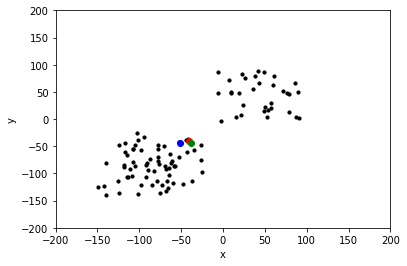

In [15]:
plt.scatter(data['x'], data['y'], color='k', s = 10) 

color = ['r', 'g', 'b'] # red green blue
for i in range(3):      # 3개의 centroid를 다른 색깔로 표현 위해
    plt.scatter(*recent_centroids[i], color = color[i])
    
plt.xlim(-200, 200)    
plt.ylim(-200, 200)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# label을 할당하는 함수

In [16]:
 # k: number of clusters // nop: number of points// df: dataframe // centroids: recent centroids
def assignLabel(k, nop, df, centroids):
        for i in range(nop):   # point 갯수만큼 반복
            x = df.iloc[i,0]   # x 
            y = df.iloc[i,1]   # y       
            
            # 가장 가까운 cluster를 0번째 cluster로 가정하고 distance까지 구함
            closest = 0       
            closest_distance = ((x - centroids[0][0]) ** 2 
                                + (y - centroids[0][1]) ** 2)           
            
            for j in range(1, k): # cluster 1 ~ cluster k -1 까지 반복
                current_distance = ((x - centroids[j][0]) ** 2 
                                    + (y - centroids[j][1]) ** 2)
                if closest_distance > current_distance :
                    closest = j
                    closest_distance = current_distance
                    
            # 가장 가까운 cluster number를 label로 할당
            df.iloc[i,2] = closest
            
        return df                      
             

# initial label 할당 

In [17]:
data = assignLabel(3, 100, data, recent_centroids)

# initial label

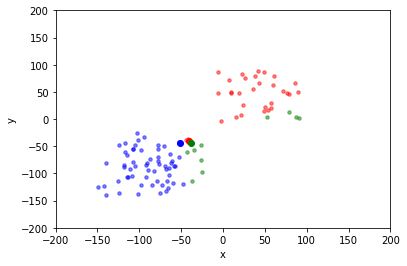

In [18]:
color = ['r', 'g', 'b'] # red green blue

for i in range(3):
    plt.scatter(data[data['label'] == i]['x'], data[data['label'] == i]['y'], 
                color = color[i], alpha = 0.5, s = 12) 


for i in range(3):  # 3개의 centroid를 다른 색깔로 표현 위해
    plt.scatter(*recent_centroids[i], color = color[i])
    
plt.xlim(-200, 200)    
plt.ylim(-200, 200)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# *assignLabel 함수 구체적으로 살펴보기 *

### *point 개수만큼 반복하여 x좌표, y좌표 값을 가져온다 *

In [37]:
for i in range(10):            # point 갯수만큼 반복
            x = df.iloc[i,0]   # x 
            y = df.iloc[i,1]   # y
            print([x,y])            
            

[42.628731443950386, 131.51317508026258]
[117.18721181886504, 140.45318408218634]
[129.33479993912965, 65.88039293807265]
[112.00932370561732, 104.75089766733623]
[52.73313971999475, 66.73488306996171]
[54.147036548674215, 65.42678386035765]
[80.70625030054877, 105.0382100097135]
[111.06608715851763, 99.29613655876712]
[125.51926979470761, 76.79832305976532]
[134.66814956999457, 104.10801367357686]


### *점들간의 Distance 를 다음과 같이 정의*

## $D = (x_{1} - x_{2})^2 + (y_{1} - y_{2})^2$

### *모든 centroid와의 거리를 계산해 가장 가까운 centroid에 속하도록 label을 변경*

In [38]:
            # 가장 가까운 cluster를 0번째 cluster로 가정하고 distance까지 구함
            closest = 0       
            closest_distance = ((x - centroids[0][0]) ** 2 + 
                                (y - centroids[0][1]) ** 2)            
            
            #예시를 위해 k = 1이라고 가정함
            for j in range(1, 1): # cluster 1 ~ cluster k -1 까지 반복
                current_distance = ((x - centroids[j][0]) ** 2 + 
                                    (y - centroids[j][1]) ** 2)
                if closest_distance > current_distance :
                    closest = j
                    closest_distance = current_distance
                    
            # 가장 가까운 cluster number를 label로 할당
            df.iloc[i,2] = closest

### *위 과정을 모든 point 개수만큼 반복하고 변경된 dataframe을 return한다. // assignLabel(k, nop, df, centroids)*

# energy를 계산하는 함수 

In [19]:
def computeEnergy(df, nop, centroids):
    
    energy = 0  # energy
    
    for i in range(nop):         # point 갯수만큼 반복
            x = df.iloc[i,0]     # x 
            y = df.iloc[i,1]     # y 
            label = df.iloc[i,2] # label
            # 각 point가 속하는 centroid와의 거리 총합
            energy += ((x - centroids[label][0]) ** 2 + 
                       (y - centroids[label][1]) ** 2) 
            
    energy /= nop  # 거리 총합에서 평균이 energy
    
    return energy

### *Energy를 다음과 같이 정의*

## $E = \frac{1}{n}\sum\limits_{i=1}^n$ $(x_{i} - c_{k_{i}})^2$      $(k_{i}$ is the label of $x_{i})$

# centroid 가 변하지 않을 때까지 label 할당과 centroid 변경

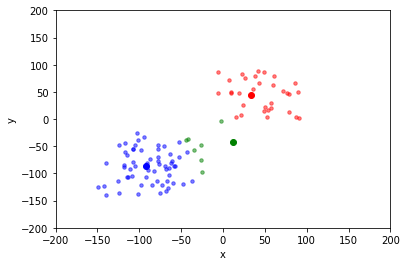

Energy: 1693.125844


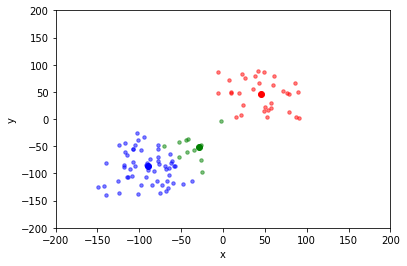

Energy: 1469.392769


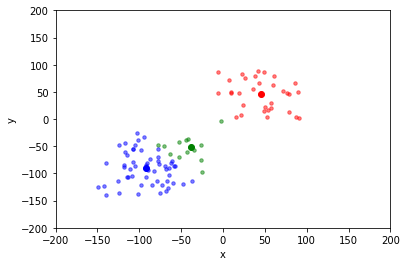

Energy: 1441.696272


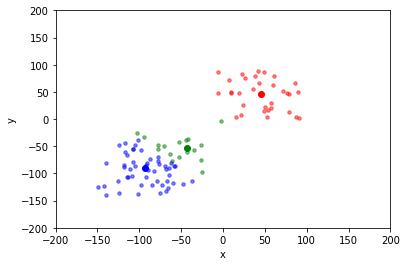

Energy: 1428.244383


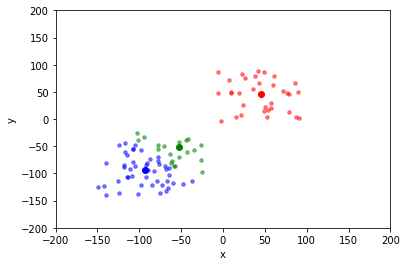

Energy: 1392.674772


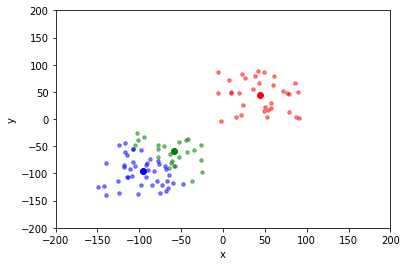

Energy: 1364.022599


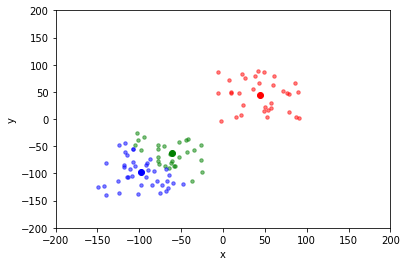

Energy: 1350.102177


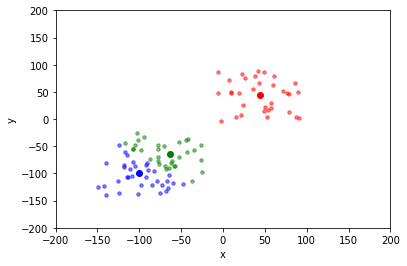

Energy: 1337.299387


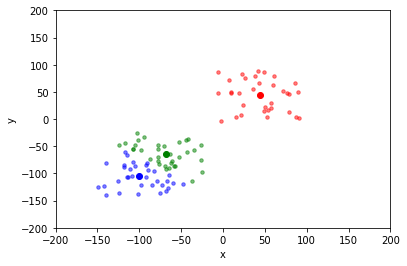

Energy: 1315.534556


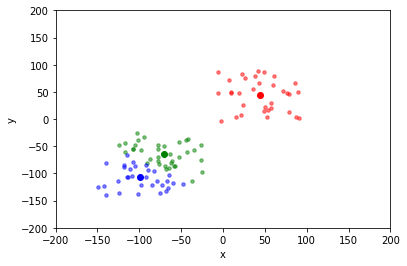

Energy: 1310.432163


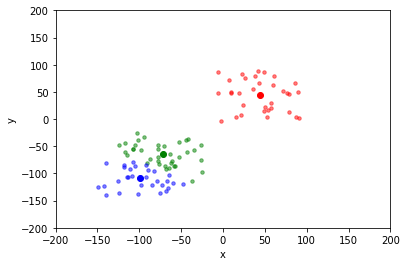

Energy: 1304.753104


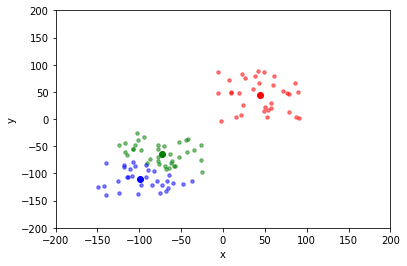

Energy: 1302.892763


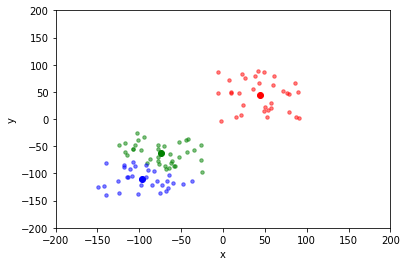

Energy: 1300.601754


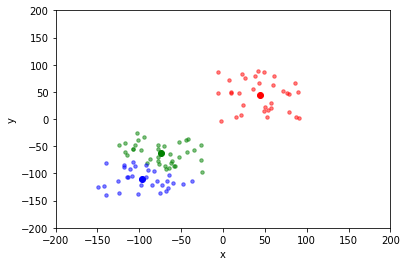

Energy: 1300.601754


In [20]:
while True:
    old_centroids = recent_centroids # old centroid를 저장
    recent_centroids = computeCentroid(3, data)
    data = assignLabel(3, 100, data, recent_centroids)
    
    for i in range(3):
        plt.scatter(data[data['label'] == i]['x'], data[data['label'] == i]['y'],
                    color = color[i], alpha = 0.5, s = 12) 

    for i in range(3):      # 3개의 centroid를 다른 색깔로 표현 위해
        plt.scatter(*recent_centroids[i], color = color[i])
    
    plt.xlim(-200, 200)    
    plt.ylim(-200, 200)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    # energy  출력
    print("Energy: %f" % computeEnergy(data, 100, recent_centroids)) 
    # if converged
    if old_centroids == recent_centroids:
        break

centroid에 변경이 없어서 종료   (converged)

## Name : 백찬희
## Student ID : 20142503
## Github : https://github.com/Baekchanhee/assignment03.git